# Header

In [1]:
import importlib
import Definitions  # Import the module

importlib.reload(Definitions)  # Reload the module to get the updated definitions

from Definitions import *

# Commun

In [2]:
try:
    del table
    del table_keep
    del table_shifted
except:
    pass
folder = 1
folder_cross = 3
Healpix_folder = 2

#On nettoie le sample de base
name_1 = "eROSITAdr1"
# name_1 = "eROSITAdr1_shifted"

#On a récupére le crossmatch Gaia avec TOPCAT puis on ajoute les colones qui nous interesse et enléve les nul.
name_2 = "eROSITAdr1_keep-Gaiadr3"
# name_2 = "eROSITAdr1_shifted_keep-Gaiadr3"

#On attribue des probabilités positionel ET via le couleur vs couleur
# name_3 = "eROSITAdr1_keep-Gaiadr3_flag_small"
# name_shifted_3 = "eROSITAdr1_shifted_keep-Gaiadr3_flag_small" #le "_small" est utile pour le catalogue ENORME

# name_3 = "eROSITAdr1_keep-Gaiadr3_flag"
# name_shifted_3 = "eROSITAdr1_shifted_keep-Gaiadr3_flag"

name_3 = "eROSITAdr1_keep-Gaiadr3_keep"
name_shifted_3 = "eROSITAdr1_shifted_keep-Gaiadr3_keep"


# 1 Clean and flags before cross

In [ ]:
table = Table.read(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/0_{name_1}.fits")
print(f"0_{name_1}.fits lue")

table["Keep"] = True
choix = []

Flags (choix utilisateur)

In [ ]:
table["FSPSNR"] = table["FSPSNR"].astype(bool) #Remove
table["FSPBPS"] = table["FSPBPS"].astype(bool) #Remove
table["FSPSCL"] = table["FSPSCL"].astype(bool)
table["FSPLGA"] = table["FSPLGA"].astype(bool)
table["FSPGCCons"] = table["FSPGCCons"].astype(bool)
table["FNORADEerr"] = table["FNORADEerr"].astype(bool) #Remove
table["FNOEXTerr"] = table["FNOEXTerr"].astype(bool) #Remove
table["FNOCTSerr"] = table["FNOCTSerr"].astype(bool) #Remove
table["FOPT"] = table["FOPT"].astype(bool) #Remove

kick_n_print(table["MLRate1"] < 0.038 , "les moins brillante (carte homogéne)" , "Faint" , table)
choix.append('table["MLRate1"] < 0.038')

kick_n_print((table["FSPSNR"]) | (table["FSPBPS"]) | (table["FNORADEerr"]) | (table["FNOEXTerr"]) | (table["FNOCTSerr"]) | (table["FOPT"]) , "les flagué" , "Flaged" , table)
choix.append('(table["FSPSNR"]) | (table["FSPBPS"]) | (table["FNORADEerr"]) | (table["FNOEXTerr"]) | (table["FNOCTSerr"]) | (table["FOPT"])')

# kick_n_print(table["DetLike0"] < 10, "les detections peu probable" , "Unlikely")

kick_n_print(table["EXT"] > 0 , "les sources étendu" , "Extended" , table)
choix.append('table["EXT"] > 0')

kick_n_print(table["posErr"] > 8 , "les sources avec une erreur de position > 8" , "BadAstro" , table)
choix.append('table["posErr"] > 8')
print(f"Proportion perdu si on retire les différentes conditions:",round(len(table[table["Keep"] == False])/len(table) * 100),"%")

Write Logs + table

In [ ]:
f = open(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/choix.txt", "w")
for item in choix:
    f.write(f"{item}\n")
f.close()
del choix

table.write(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/1_{name_1}_flag.fits",overwrite = True)

table_keep = table[table["Keep"]]
del table

col_kick = ["FSPSNR","FSPBPS","FNORADEerr","FNOEXTerr","FNOCTSerr","FOPT","Faint","Flaged","Extended","BadAstro", "not_Faint","not_Flaged","not_Extended","not_BadAstro","Keep"] #"Unlikely" , "not_Unlikely"
table_keep.remove_columns(col_kick)
table_keep.write(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/1_{name_1}_keep.fits",overwrite = True)

# 2 Column creation + flags

In [ ]:
table = Table.read(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/2_{name_2}.fits")
print(f"2_{name_2}.fits lue dans General_method_{folder}")

try:
    col_kick = ['RADEcor', 'RAPlxcor', 'RApmRAcor', 'RApmDEcor', 'DEPlxcor', 'DEpmRAcor', 'DEpmDEcor', 'PlxpmRAcor', 'PlxpmDEcor', 'pmRApmDEcor', 'NAL', 'NAC', 'NgAL', 'NbAL', 'gofAL', 'chi2AL', 'epsi', 'sepsi', 'nueff', 'pscol', 'e_pscol', 'RApscolCorr', 'DEpscolCorr', 'PlxpscolCorr', 'pmRApscolCorr', 'pmDEpscolCorr', 'MatchObsA', 'Nper', 'amax', 'MatchObs', 'IPDgofha', 'IPDgofhp', 'IPDfmp', 'IPDfow', 'NBPcont', 'NBPblend', 'NRPcont', 'NRPblend', 'n_RV', 'o_RV', 'o_RVd', 'RVNper', 'RVS/N', 'RVgof', 'RVchi2', 'RVTdur', 'RVamp', 'RVtempTeff', 'RVtemplogg', 'RVtemp[Fe/H]', 'Vatmparam', 'vbroad', 'e_Vbroad', 'o_Vbroad', 'GRVSmag', 'e_GRVSmag', 'o_GRVSmag', 'RVSS/N', 'Lib', 'RAJ2000', 'DEJ2000', 'e_RAJ2000', 'e_DEJ2000', 'RADEcorJ2000']
    table.remove_columns(col_kick)
    print(f"{col_kick} retiré")
    del col_kick
except:
    del col_kick
    pass

Création de : erreur combiné, distance, Gabs, Lg, Fx, Lx, Gabs_corr, Color_corr, FG (recalcul), LogFluxR
Prise en compte de la PM (et donc recalcul de l'angDist)
Création d'x,y,z (centre galactique au 0,0,0)
Création d'un ranking de proximité
Indexage des contrepartie pour crossmatch local plus loin 

In [20]:
table["e_RAdeg"] = table["e_RAdeg"].to(u.arcsec)
table["e_DEdeg"] = table["e_DEdeg"].to(u.arcsec)
add_or_replace_column(table, np.sqrt(table['e_RAdeg']**2 + table['e_DEdeg']**2), "s_Pos_O")
table["s_Pos_O"].unit = u.arcsec

add_or_replace_column(table, 1/table['Plx'] * 1000, "Distance")
table["Distance"].unit = u.pc
table['Distance'][table['Distance'] < 1/np.max(table['Plx']) * 1000] = np.nan

add_or_replace_column(table, 5 - 5 * np.log10(table['Distance']) + table['Gmag'], "Gabs")
table["Gabs"].unit = u.mag
add_or_replace_column(table, 3.846*10**33 * 10**((4.67-table['Gabs'])/2.5), "Lg")
table["Lg"].unit = u.erg/u.s

add_or_replace_column(table, table['MLRate1'] * 8.5e-13, "Fx") # Assuming fct du Nh, Tcouronne
table["Fx"].unit = u.erg/u.s/u.cm**2
add_or_replace_column(table, table['Fx'] * 4*np.pi*(table['Distance']*3.86e18)**2, "Lx")
table["Lx"].unit = u.erg/u.s
add_or_replace_column(table, table['Gabs'] - table['AG'], "Gabs_corr")
table["Gabs_corr"].unit = u.mag
add_or_replace_column(table, table['BP-RP'] - table['E(BP-RP)'], "Color_corr")

add_or_replace_column(table, 10**(-table['Gmag']/2.5) * 2.5*1e-9 * 5822.39, "FG")
table["FG"].unit = u.erg/u.s/u.cm**2

add_or_replace_column(table, np.log10(table['Fx']/table['FG']), "LogFluxR") #faire en sorte que ce soit compris comme y dans TOPCAT
table.rename_column("BP-RP" , "BP_RP")

# Transform ICRS coordinates to Galactic and add/replace columns
# Les coordonée de Gaia étant à epoch 2016, je vais maintenant tout shifter en juin 2020 étant la date moyenne d'observation d'eROSITA
# Je remplace les pm manquante par des quasi 0 (pas =0 pour pas éclipser par la suite les vrais 0)

table["pmRA"][np.isnan(table["pmRA"])] = 1e-10
table["pmDE"][np.isnan(table["pmDE"])] = 1e-10

coordinates = SkyCoord(ra=table['RAdeg'] , dec= table['DEdeg'] , frame='icrs', unit='deg' , pm_ra_cosdec=table['pmRA'], pm_dec=table['pmDE'], obstime=Time('2016-01-01T00:00:00.000', scale='utc'))
coordinates = coordinates.apply_space_motion(new_obstime=Time('2020-03-17T00:00:00.000', scale='utc'))

table["RAdeg"] = coordinates.ra.deg
table["RAdeg"].unit = u.deg
table["DEdeg"] = coordinates.dec.deg
table["DEdeg"].unit = u.deg

table["pmRA"][table["pmRA"] == 1e-5] = np.nan
table["pmDE"][table["pmDE"] == 1e-5] = np.nan

Galactic_coordinates = coordinates.transform_to('galactic')
add_or_replace_column(table, Galactic_coordinates.l, "glon")
add_or_replace_column(table, Galactic_coordinates.b, "glat")

table["angDist"] = haversine_arcsec(table["RA_ICRS"], table["DE_ICRS"], table["RAdeg"], table["DEdeg"]) # je recalcule l'angDist

del coordinates, Galactic_coordinates

# Convert galactic coordinates to Cartesian coordinates and add/replace columns
x, y, z = lb_to_xyz(table['glon'], table['glat'], table['Distance'])
add_or_replace_column(table, x, "x")
add_or_replace_column(table, y, "y")
add_or_replace_column(table, z, "z")
table['x'].unit = u.pc
table['y'].unit = u.pc
table['z'].unit = u.pc
del  x, y, z

add_or_replace_column(table, np.sqrt(table['posErr'] **2 + table['s_Pos_O']**2), "s_Pos")
# table.rename_column("posErr" , "posErr_X") 

#Trouver le nième voisin
sorted_index = np.lexsort((table["angDist"] , table["IAUName"]))
table = table[sorted_index]
table['ProximityRank'] = 0

_, counts = np.unique(table['IAUName'], return_counts=True)

ranks = np.concatenate([np.arange(1, count + 1) for count in counts])

table['ProximityRank'] = ranks
del counts , ranks , sorted_index

table.add_index(['IAUName', 'DR3Name']) # Pour la table astropy
table["Index"] = np.arange(len(table))+1 # Pour la table TOPCAT

Flags (choix de l'utilisateur)

In [ ]:
x = np.linspace(-1 , 8 , 91)
plt.figure(figsize=(10, 10))
plt.scatter(table["BP_RP"][table["Gmag"]<15] , table["E(BP/RP)"][table["Gmag"]<15], s=0.1 , zorder = 0)
plt.plot(x , 1.3 + 0.06* x**2 , zorder = 1 , color = "red")
plt.ylim(0,8)

In [ ]:
choix = []
table["Keep"] = True


kick_n_print(table["angDist"] > 3.4 * table["s_Pos"] , "les candidats plus loin de 3.4 fois l'erreur" , "big_angDist", table)
choix.append('table["angDist"] > 3.4 * table["s_Pos"]')

kick_n_print(np.isnan(table["BP_RP"]) , "les sources sans couleur Gaia" , "no_color" , table)
choix.append('np.isnan(table["BP-RP"])')




#pour le catalogue keep (pas sur de garder ça)


# kick_n_print(table["RPlx"] < 3 , "les sources avec un RPlx < 3" , "small_RPlx" , table)
# choix.append('table["RPlx"] < 3')

kick_n_print(table["E(BP/RP)"] > (1.3 + 0.06 * (table["BP_RP"]**2)) , "les sources avec une couleur non fiable" , "bad_color" , table)
choix.append('table["E(BP/RP)"] > (1.3 + 0.06 * (table["BP_RP"]**2))')

# kick_n_print((table["Plx"] < 0.5) , "les sources top loin" , "big_Distance")
# choix.append('table["Plx"] < 0.5')
# kick_n_print((table["RPlx"] < 5) , "les mauvaises mesures" , "small_RPlx" , table)
# choix.append('table["RPlx"] < 5')
# kick_n_print((table["Gmag"] > 19) , "les étoiles trop peu brillante" , "faint" , table)
col_kick = ["big_angDist" , "not_big_angDist" , "no_color" , "not_no_color" , "Keep" , "bad_color" , "not_bad_color"]
choix.append('Radius = 27.2 arcsec')
print(f"Proportion perdu si on retire les différentes conditions:",round(len(table[table["Keep"] == False])/len(table) * 100),"%")


Writing table and logs after crossmatch and columns creation (in two part because otherwise the kenel explode)

In [ ]:
print(f"On a lu {name_2} depuis le fichier General_method_{folder} et on écris dans le fichier Cross_{folder_cross}")

In [ ]:
print(f"On a lu {name_2} depuis le fichier General_method_{folder} et on écris dans le fichier Cross_{folder_cross}")

f = open(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/choix.txt", "w")
for item in choix:
    f.write(f"{item}\n")
f.close()
del choix

# table.write(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/3_{name_2}_flag.fits",overwrite = True)

table_keep = table[table["Keep"]]
del table
table_keep.remove_columns(col_kick)

table_keep.write(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/3_{name_2}_keep.fits",overwrite = True)


# 3 Attribution des probabilitées

Read table

In [3]:
table = Table.read(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/3_{name_3}.fits")
print(f"3_{name_3}.fits lue dans le General_method_{folder} et Cross_{folder_cross}")
table_shifted = Table.read(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/3_{name_shifted_3}.fits")
print(f"3_{name_shifted_3}.fits lue dans le General_method_{folder} et Cross_{folder_cross}")

3_eROSITAdr1_keep-Gaiadr3_keep.fits lue dans le General_method_1 et Cross_3
3_eROSITAdr1_shifted_keep-Gaiadr3_keep.fits lue dans le General_method_1 et Cross_3


Choix utilisateur

In [4]:
choix = []
threshold_x = 1000
choix.append(f"threshold_x = {threshold_x}")

threshold_ratio = 1.2
choix.append(f"threshold_ratio = {threshold_ratio}")

bins = np.linspace(0,3.4,18)
choix.append(f"bins = np.linspace({bins[0]},bins[-1],{len(bins)})")

order = 2
choix.append(f"On commence le decoupage du ciel à l'ordre = {order}")

#Color vs color

N = 151
choix.append(f"Grille = {N}x{N}")

minmax_x = [-4,7]
# minmax_x = [-0.5,6]
choix.append(f"minmax_x = {minmax_x}")

minmax_y = [-6.5,2.5]
# minmax_y = [-6.5,1]
choix.append(f"minmax_y = {minmax_y}")

N_kernel = 5
choix.append(f"Kernel = {N_kernel}x{N_kernel}")

Test interface graphique

In [5]:
# import tkinter as tk
# from tkinter import Scale, Entry, Label

# def update_values():
#     global threshold_x, threshold_ratio, bins, order, N, minmax_x, minmax_y, N_kernel
#     threshold_x = int(threshold_x_entry.get())
#     threshold_ratio = float(threshold_ratio_entry.get())
#     bins = np.linspace(0, float(bin_max_entry.get()), int(bin_count_entry.get()))
#     order = int(order_entry.get())
#     N = int(grid_size_entry.get())
#     minmax_x = [float(min_x_entry.get()), float(max_x_entry.get())]
#     minmax_y = [float(min_y_entry.get()), float(max_y_entry.get())]
#     N_kernel = int(kernel_size_entry.get())
#     print("Updated values:")
#     print(f"threshold_x = {threshold_x}")
#     print(f"threshold_ratio = {threshold_ratio}")
#     print(f"bins = {bins}")
#     print(f"order = {order}")
#     print(f"Grille = {N}x{N}")
#     print(f"minmax_x = {minmax_x}")
#     print(f"minmax_y = {minmax_y}")
#     print(f"Kernel = {N_kernel}x{N_kernel}")

# app = tk.Tk()
# app.title("Parameter Configuration")

# threshold_x_entry = Entry(app)
# threshold_x_entry.insert(0, "2000")
# threshold_x_entry.pack()

# threshold_ratio_entry = Entry(app)
# threshold_ratio_entry.insert(0, "3")
# threshold_ratio_entry.pack()

# bin_max_entry = Entry(app)
# bin_max_entry.insert(0, "3.4")
# bin_max_entry.pack()

# bin_count_entry = Entry(app)
# bin_count_entry.insert(0, "18")
# bin_count_entry.pack()

# order_entry = Entry(app)
# order_entry.insert(0, "2")
# order_entry.pack()

# grid_size_entry = Entry(app)
# grid_size_entry.insert(0, "151")
# grid_size_entry.pack()

# min_x_entry = Entry(app)
# min_x_entry.insert(0, "-4")
# min_x_entry.pack()

# max_x_entry = Entry(app)
# max_x_entry.insert(0, "7")
# max_x_entry.pack()

# min_y_entry = Entry(app)
# min_y_entry.insert(0, "-6.5")
# min_y_entry.pack()

# max_y_entry = Entry(app)
# max_y_entry.insert(0, "2.5")
# max_y_entry.pack()

# kernel_size_entry = Entry(app)
# kernel_size_entry.insert(0, "3")
# kernel_size_entry.pack()

# update_button = tk.Button(app, text="Update Values", command=update_values)
# update_button.pack()

# app.mainloop()


Positionel

In [1]:
import importlib
import Definitions  # Import the module

importlib.reload(Definitions)  # Reload the module to get the updated definitions

from Definitions import *

In [34]:
#angDist/S_Pos
table = initialize_table(table, order) #I add "order" and "Healpix" as columns to the table
table_shifted = initialize_table(table_shifted, order) #Same for the shifted table
Healpix_table = create_healpix_table(order, table) #Creation of the ealpix_table (cool for stats)
Healpix_table = update_healpix_table(order, Healpix_table, table, table_shifted, threshold_x, threshold_ratio) #Isolate pixels that need to be divided according to the 2 criterii, in a while loop until there is no more pixels to divide
table = initialize_probability_columns(table)
calculate_probabilities(Healpix_table, table, table_shifted, bins)
table = rank_probabilities(table, "Probability_angDist")

Liste des ordres: [2, 3, 4]
c and s too big:%%
c= 97257.99101313182 
s= 1011.2085737892362
c and s too big:4 %
c= 4317735.907617511 
s= 1040.4548293545233
c and s too big:6 %
c= 5028384.9159552045 
s= 1102.7845137599832
c and s too big:8 %
c= 1903887.1848118412 
s= 783.5200016600436
c and s too big:6 %
c= 5829602.284916864 
s= 984.7369814678569
c and s too big:3 %
c= 427154.19423091586 
s= 577.0357828304445
c and s too big:1 %
c= 532217.2301790802 
s= 821.3035866576689
c and s too big:4 %
c= 282631.13109006337 
s= 888.9467532799277
c and s too big:6 %
c= 2198460.1968476297 
s= 928.9326257849166
c and s too big:5 %
c= 2429497.9468781855 
s= 909.0716855428155
c and s too big:4 %
c= 75732.17216140221 
s= 638.5076441656146
c and s too big:2 %
c= 2413938.102156026 
s= 1029.7658649141922
Complétion: 100 % %


Color vs Color

In [35]:
#Color vs color
mask =  (np.isnan(table["BP_RP"]) == False) & (np.isnan(table["LogFluxR"]) == False) #& (table["big_angDist"] == False) #en fait actuellement c'est mon keep
x = table["BP_RP"][mask]
y = table["LogFluxR"][mask]

mask_shifted = (np.isnan(table_shifted["BP_RP"]) == False) & (np.isnan(table_shifted["LogFluxR"]) == False) #& (table_shifted["big_angDist"] == False)
x_shifted = table_shifted["BP_RP"][mask_shifted]
y_shifted = table_shifted["LogFluxR"][mask_shifted]



print(f"On travail avec {len(x)} sources dans le catalogue total et {len(x_shifted)} sources dans le catalogue shifted. La grille est de {N}x{N} tq x = {minmax_x} et y = {minmax_y}")

X , Y , counts         = data_to_hist2D(x        ,y        ,minmax_x , minmax_y , N)
_ , _ , counts_shifted = data_to_hist2D(x_shifted,y_shifted,minmax_x , minmax_y , N)

clean = 1 - (counts_shifted / counts ) #Donne la proportion de bonne donnée sur une grille
clean[(counts == 0) | (clean < 0)] = 0
clean[(counts_shifted == 0) & (counts ==0)] = 0.
errors = (1 / counts) * np.sqrt( counts_shifted * (1 + (counts_shifted /counts) ) )
errors[counts == 0] = np.nan
relative_error = errors / clean
relative_error[clean == 0] = np.nan


kernel = np.ones((N_kernel, N_kernel)) / N_kernel**2
clean_smooth = convolve(clean, kernel, mode='constant', cval=0.0) # mode='constant', cval=0.0 pour que les bords soient 0


grid = Table([X.ravel(),Y.ravel(),clean_smooth.ravel(),clean.ravel(),errors.ravel(),relative_error.ravel(),counts.ravel(),counts_shifted.ravel()],names = ("x","y","proba","proba_no_kernel","error" , "relative_error","counts","counts_shifted"))

nonanmask = (np.isnan(table["BP_RP"]) == False) & (np.isnan(table["LogFluxR"]) == False)
proba = find_nearest(grid,table["BP_RP"][nonanmask],table["LogFluxR"][nonanmask],"proba")

table[f"Probability_color_vs_flux_ratio"] = 0.
table[f'Probability_color_vs_flux_ratio'] = table[f'Probability_color_vs_flux_ratio'].astype(float)
table[f"Probability_color_vs_flux_ratio"][nonanmask] = proba


table = rank_probabilities(table, "Probability_color_vs_flux_ratio") 


On travail avec 858371 sources dans le catalogue total et 687818 sources dans le catalogue shifted. La grille est de 151x151 tq x = [-4, 7] et y = [-6.5, 2.5]


Proba multiplication et ranking

In [36]:
#Multiplication des proba
table[f"Probability_total"] = 0.
table[f"Probability_total"] = table["Probability_angDist"] * table[f"Probability_color_vs_flux_ratio"]

table = rank_probabilities(table, "Probability_total") #A vérifier, old version en dessous


# # Tri en fonction de 'Probability_total' (ordre décroissant) et 'IAUName'
# sorted_index = np.lexsort((-table[f"Probability_total"], table["IAUName"]))  # le "-" est là pour simuler un ordre décroissant
# table_copy = Table(np.copy(table[sorted_index]))  # Créer une copie triée

# # Initialiser la colonne des rangs dans 'table'
# table['ProbabilityRank'] = 0

# # Utilisation de numpy pour obtenir les tailles de chaque groupe d'IAUName
# unique_iau, counts = np.unique(table_copy['IAUName'], return_counts=True)

# # Générer les rangs par groupe d'IAUName
# ranks = np.concatenate([np.arange(1, count + 1) for count in counts])

# # Assigner ces rangs dans la table triée
# # table_copy['ProbabilityRank'] = ranks #Inutile ???

# # Remplacer les rangs dans la table originale en utilisant les index triés
# table['ProbabilityRank'][sorted_index] = ranks

# # Flag de la probabilité la plus élevée
# table["HighestProbability"] = False
# table["HighestProbability"][table['ProbabilityRank'] == 1] = True



# del counts , ranks , sorted_index

Writing table

In [10]:
# print(f"On a lu {name_3} et {name_shifted_3} depuis le dossier General_method_{folder}/Cross_{folder_cross} puis on écris dans le dossier Healpix_{Healpix_folder}")

In [37]:
print(f"On a lu {name_3} et {name_shifted_3} depuis le dossier General_method_{folder}/Cross_{folder_cross} puis on écris dans le dossier Healpix_{Healpix_folder}")

f = open(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/Healpix_{Healpix_folder}/choix.txt", "w")
f.close()

f = open(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/Healpix_{Healpix_folder}/choix.txt", "a")
for choices in choix:
    f.write(f"{choices}\n")
f.close()

table.write(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/Healpix_{Healpix_folder}/Probability_map.fits",overwrite = True)
Healpix_table.write(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/Healpix_{Healpix_folder}/Healpix_map.fits",overwrite = True)
grid.write(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/Healpix_{Healpix_folder}/Grille_map.fits",overwrite = True)

On a lu eROSITAdr1_keep-Gaiadr3_keep et eROSITAdr1_shifted_keep-Gaiadr3_keep depuis le dossier General_method_1/Cross_3 puis on écris dans le dossier Healpix_1


In [58]:
del table,grid,Healpix_table

# 4 Proba map working

In [2]:
name = "Probability_map"
# name = "eROSITAdr1_keep-Gaiadr3_keep"

In [5]:
table = Table.read(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/Healpix_{Healpix_folder}/{name}.fits")
print(f"I read {name}.fits from General_method_{folder}/Cross_{folder_cross}/Healpix_{Healpix_folder}")
print("Nombre total de sources:\n" , len(table["IAUName"]) ,"\nNombre d'unique X:\n",len(np.unique(table["IAUName"])) )
print(f'{round(len(table["IAUName"]) / len(np.unique(table["IAUName"])) , 2)} voisins en moyenne')
print("Here, choices are:")
f = open(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/Healpix_{Healpix_folder}/choix.txt", "r")
for line in f:
    print(line)
f.close()

I read Probability_map.fits from General_method_1/Cross_3/Healpix_1
Nombre total de sources:
 858376 
Nombre d'unique X:
 350040
2.45 voisins en moyenne
Here, choices are:
threshold_x = 1000

threshold_ratio = 1.2

bins = np.linspace(0.0,bins[-1],18)

On commence le decoupage du ciel à l'ordre = 2

Grille = 151x151

minmax_x = [-4, 7]

minmax_y = [-6.5, 2.5]

Kernel = 5x5



## C & R

### For 1 Proba in particular

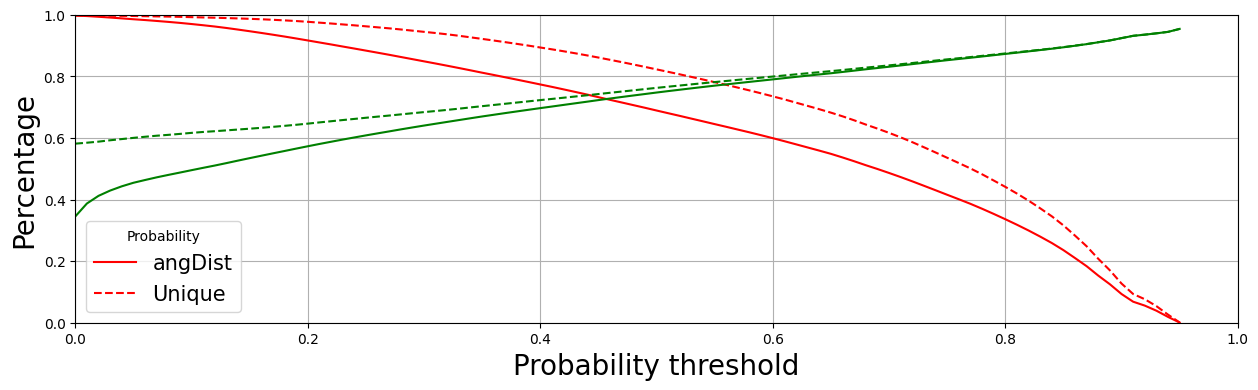

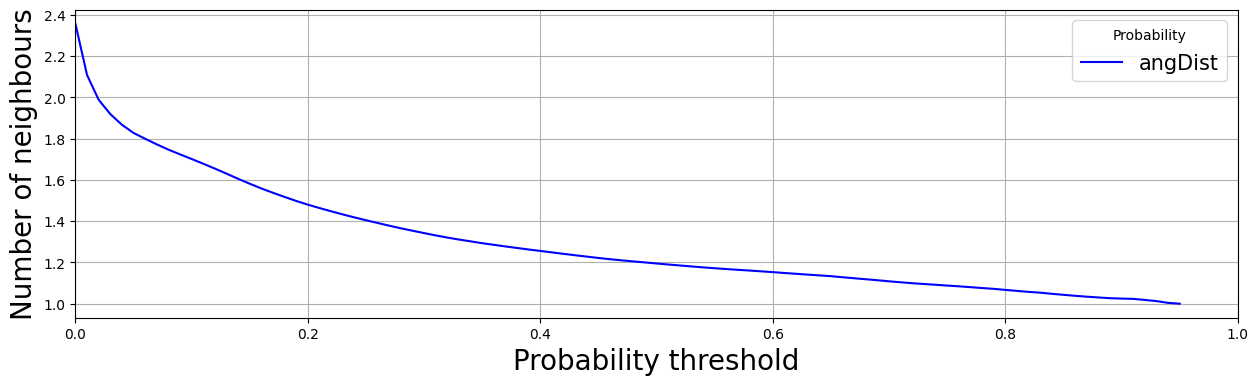

In [ ]:
Choice = 1 ; mask = np.ones(len(table) , dtype = bool)   #1 = angDist, 2 = color_vs_flux_ratio, 3 = total
P = ["Probability_angDist" , "Probability_color_vs_flux_ratio" , "Probability_total"] # just for copy paste, "P" not used in code
liste_threshold = np.linspace(0,1,101)
Proba = P[Choice -1]
C , R , C2 , R2 , N= CR_computation(table ,Proba,liste_threshold,mask )
colors = ["blue" , "orange" , "green"]

plt.figure(figsize=(15,4))
plt.plot(liste_threshold,C  , label = Proba[12:] , color = "red"   )
plt.plot(liste_threshold,C2 , label = "Unique"  , color = "red"   , linestyle = "dashed")
plt.plot(liste_threshold,R                      , color = "green"  )
plt.plot(liste_threshold,R2                     , color = "green" , linestyle = "dashed")

# plt.scatter(liste_threshold,reliability , marker = "x" , color = "black")
plt.xlim(0,1)
plt.ylim(0,1)
# plt.title("C&R Freund. no p_coronal < 0.5 !!!!")
_ = plt.legend(fontsize = 15 , title = "Probability")
plt.xlabel("Probability threshold" , fontsize = 20)
plt.ylabel("Percentage" , fontsize = 20)

plt.grid(True)

plt.figure(figsize=(15,4))
plt.plot(liste_threshold,N  , label = Proba[12:] , color = "blue" )
plt.xlim(0,1)
plt.xlabel("Probability threshold" , fontsize = 20)
plt.ylabel("Number of neighbours" , fontsize = 20)
_ = plt.legend(fontsize = 15 , title = "Probability")
plt.grid(True)


### For the 3 Proba

In [ ]:
colors = ["blue" , "orange" , "green"]
for Proba,color in zip(P,colors):
    plt.figure(figsize=(15,4))

    C , R , C2 , R2 , N= CR_computation(table ,Proba,liste_threshold,mask )
    plt.plot(liste_threshold,C  , label = Proba[12:] , color = color)
    plt.plot(liste_threshold,C2 , label = "Unique"   , color = color , linestyle = "dashed")
    plt.plot(liste_threshold,R                       , color = color)
    plt.plot(liste_threshold,R2                      , color = color , linestyle = "dashed")

    # plt.scatter(liste_threshold,reliability , marker = "x" , color = "black")
    plt.xlim(0,1)
    plt.ylim(0,1)
    # plt.title("C&R Freund. no p_coronal < 0.5 !!!!")
    _ = plt.legend(fontsize = 15)
    plt.xlabel("Probability threshold" , fontsize = 20)
    plt.ylabel("Percentage" , fontsize = 20)
    plt.grid(True)

    plt.figure(figsize=(15,4))
    plt.plot(liste_threshold,N   , color = color   )
    plt.xlim(0,1)
    plt.xlabel("Probability threshold" , fontsize = 20)
    plt.ylabel("Number of neighbours" , fontsize = 20)
    plt.grid(True)

## Les Rank 1 vs Rank 2

In [35]:
rang1 = table[(table['ProximityRank'] == 1)]
rang2 = table[(table['ProximityRank'] == 2)]
mask_rang1_avec_rang2 = np.isin(rang1['IAUName'], rang2['IAUName'])
rang1_avec_rang2 = rang1[mask_rang1_avec_rang2]
rang2 = rang2[np.isin(rang2["IAUName"],rang1_avec_rang2["IAUName"])]

In [ ]:
print(f"Taille de la liste rang 1: {len(rang1)}. Taille de la liste rang 2: {len(rang2)}")

In [ ]:
mask = (~np.isnan(rang1_avec_rang2["Distance"])) & (~np.isnan(rang2["Distance"])) & (rang1_avec_rang2["RPlx"] > 3) & (rang2["RPlx"] > 3)

x=np.linspace(np.nanmin(rang1_avec_rang2["Distance"]),np.nanmax(rang1_avec_rang2["Distance"]),2)
plt.figure(figsize=(15, 6))
# plt.scatter(rang1_avec_rang2["Distance"][mask], rang2["Distance"][mask], alpha=0.5, s=1)
plt.hist2d(rang1_avec_rang2["Distance"][mask], rang2["Distance"][mask] , bins = np.logspace(0,4,50) , norm = 'log' , cmap = 'Spectral')
plt.plot(x,x,color="red",linewidth = 0.5, linestyle = "dashed")
plt.title('Comparaison des distances pour les rangs 1 et 2')
plt.xlim(1e1 , 1e4)
plt.ylim(1e1 , 1e4)
plt.xlabel('Distance Rang 1')
plt.ylabel('Distance Rang 2')
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Je vais maintenant isoler les paire de contrepartie ayant une distance d1 = d2 + ou - 10% graçe à un mask

mask = (rang1_avec_rang2["Distance"] < 1.1 * rang2["Distance"]) & (rang1_avec_rang2["Distance"] > 0.9 * rang2["Distance"]) & (~np.isnan(rang1_avec_rang2["Distance"])) & (~np.isnan(rang2["Distance"])) & (rang1_avec_rang2["RPlx"] > 3) & (rang2["RPlx"] > 3)

x=np.linspace(np.nanmin(rang1_avec_rang2["Distance"]),np.nanmax(rang1_avec_rang2["Distance"]),2)
plt.figure(figsize=(15, 6))
plt.scatter(rang1_avec_rang2["Distance"][mask], rang2["Distance"][mask], alpha=0.5, s=1)
plt.hist2d(rang1_avec_rang2["Distance"][mask], rang2["Distance"][mask] , bins = np.logspace(0,4,50) , norm = 'log' , cmap = 'Spectral')
plt.plot(x,x,color="red",linewidth = 0.5, linestyle = "dashed")
plt.title('Comparaison des distances pour les rangs 1 et 2')
plt.xlim(1e1 , 1e4)
plt.ylim(1e1 , 1e4)
plt.xlabel('Distance Rang 1')
plt.ylabel('Distance Rang 2')
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.legend()
plt.grid(True)
plt.show()

unique_x_satisfying_mask = np.unique(rang1_avec_rang2["IAUName"][mask])
print(len(unique_x_satisfying_mask))

In [99]:
table["Close_Distances"] = False
table["Close_Distances"][np.isin(table["IAUName"] , unique_x_satisfying_mask)] = True

In [ ]:
mask = (~np.isnan(rang1_avec_rang2["Gmag"])) & (~np.isnan(rang2["Gmag"]))

print(np.min(rang1_avec_rang2["Gmag"]),np.max(rang1_avec_rang2["Gmag"]) , np.min(rang2["Gmag"]),np.max(rang2["Gmag"]))
x=np.linspace(np.min(rang1_avec_rang2["Gmag"]),np.max(rang1_avec_rang2["Gmag"]),2)
plt.figure(figsize=(10, 6))
plt.hist2d(rang1_avec_rang2["Gmag"][mask], rang2["Gmag"][mask] , bins = 100 , cmap = 'Spectral' , norm = 'log')
# plt.scatter(rang1_avec_rang2["Gmag"], rang2["Gmag"], alpha=0.5, label='Rang 1 ayant un rang 2',s=1)
plt.plot(x,x,color="red",linewidth = 0.5, linestyle = "dashed")
plt.title('Comparaison des Gmag pour les rangs 1 et 2')
plt.xlabel('Gmag Rang 1')
plt.ylabel('Gmag Rang 2')
plt.legend()
plt.colorbar()
plt.grid(True)
plt.show()

In [100]:
table.write("/home/t.oliveira/Documents/1_Thesis/1_Code/Table/TESTESTEST.fits")

## HR test

In [ ]:
mask = (table["HighestProbability"] == True) & (table["Probability_total_151"] > 0.2)
HR1 = -(table["MLRateP1"][mask] - table["MLRateP2"][mask]) / (table["MLRateP1"][mask] + table["MLRateP2"][mask])
HR2 = -(table["MLRateP2"][mask] - table["MLRateP3"][mask]) / (table["MLRateP2"][mask] + table["MLRateP3"][mask])
HR3 = -(table["MLRateP3"][mask] - table["MLRateP4"][mask]) / (table["MLRateP3"][mask] + table["MLRateP4"][mask])
HR4 = -(table["MLRateP4"][mask] - table["MLRateP5"][mask]) / (table["MLRateP4"][mask] + table["MLRateP5"][mask])

mask = (np.isnan(HR1) == False) & (np.isnan(HR2) == False) & (np.isnan(HR3) == False) & (np.isnan(HR4) == False)
plt.figure(figsize = (15,10))
plt.hist2d(HR1[mask] , HR2[mask] , bins = 100 , norm = 'log' , cmap = 'Spectral')
plt.xlabel("HR1")
plt.ylabel("HR2")
plt.colorbar()

# plt.figure(figsize = (15,5))
# _ = plt.hist(HR1 , np.linspace(-1,1,21) , edgecolor = 'black')
# plt.xlabel("HR 1" , fontsize = 20)
# plt.yscale('log')

# plt.figure(figsize = (15,5))
# _ = plt.hist(HR2 , np.linspace(-1,1,21) , edgecolor = 'black')
# plt.xlabel("HR 2" , fontsize = 20)
# plt.yscale('log')

# plt.figure(figsize = (15,5))
# _ = plt.hist(HR3 , np.linspace(-1,1,21) , edgecolor = 'black')
# plt.xlabel("HR 3" , fontsize = 20)
# plt.yscale('log')

# plt.figure(figsize = (15,5))
# _ = plt.hist(HR4 , np.linspace(-1,1,21) , edgecolor = 'black')
# plt.xlabel("HR 4" , fontsize = 20)
# plt.yscale('log')

In [10]:
p = True
mask = (p > 0.5)
totale = len(table["IAUName"][mask])
unique = len(np.unique(table["IAUName"][mask]))
liste_threshold = np.linspace(0,1,101)
totale_liste = []
unique_liste = []

for threshold in liste_threshold:
    mask = (p > threshold)
    totale = table["IAUName"][mask]
    totale_liste.append(len(totale))
    unique_liste.append(len(np.unique(totale[mask])))

In [ ]:
plt.scatter(liste_threshold , totale_liste , label = "Total")

## Anything

In [6]:
print(f"Total: {len(table)}.\nUnique : {len(np.unique(table['IAUName']))}.\nAvg neighbours: {round(len(table)/len(np.unique(table['IAUName'])),2)}.")
order = 4
# density = 300
mask =  (table["order"] == order)
print(f"Total: {len(table[mask])} in order {order}.\nUnique : {len(np.unique(table['IAUName'][mask]))} in order {order}.\nAvg neighbours: {round(len(table[mask])/len(np.unique(table['IAUName'][mask])),2)} in order {order}.")

Total: 858376.
Unique : 350040.
Avg neighbours: 2.45.
Total: 505399 in order 4.
Unique : 146604 in order 4.
Avg neighbours: 3.45 in order 4.


In [112]:
from collections import Counter
# print(table.keys())
# display(table["IAUName" , "Probability_total"][500000:500040])
filtered_table = table["IAUName" , "Probability_total"][500000:500040][table[500000:500040]["Probability_total"] < 0.2]
# display(filtered_table)
iau_counts = Counter(filtered_table["IAUName"])

iau_names_multiple = [iau for iau, count in iau_counts.items() if count >= 2]

print(len(iau_names_multiple))

print(len([iau for iau, count in Counter(filtered_table["IAUName"]).items() if count >= 2]))


3
3


In [25]:
P = ["Probability_angDist" , "Probability_color_vs_flux_ratio" , "Probability_total"] # just for copy paste, "P" not used in code
colors = ["blue" , "orange" , "green"]
liste_threshold = np.linspace(0,1,101)
order_liste = np.array(np.unique(table["order"]))
density_liste = np.arange(0 , np.max(table["Density"]) + 100 , 100)
glat_liste = [0,10,90]

print(order_liste , density_liste , glat_liste)

[2 3 4] [  0. 100. 200. 300. 400.] [0, 10, 90]


In [67]:
plot_data(table, order_liste, "Order", 0 , folder , folder_cross , Healpix_folder) #0 = elements, 1 = intervals

## Old version here:

# for order in order_liste:
#     mask =  (table["order"] == order)
#     fig, axes = plt.subplots(2, 3, figsize=(11.69, 8.27))  # A4 size in inches (landscape format), with 2 rows and 3 columns
#     axes = axes.ravel()  # Flatten the array of axes for easier indexing
#     fig.suptitle(f'Order = {order} | N={len(table[mask])}', fontsize=20)

#     for idx, (Proba, color) in enumerate(zip(P, colors)):
#         C, R, C2, R2, N = CR_computation(table[mask], Proba, liste_threshold)

#         # Plotting C, C2, R, and R2 in the first row
#         ax1 = axes[idx]
#         ax1.plot(liste_threshold, C, label=Proba[12:], color=color)
#         ax1.plot(liste_threshold, C2, label="Unique", color=color, linestyle="dashed")
#         ax1.plot(liste_threshold, R, color=color)
#         ax1.plot(liste_threshold, R2, color=color, linestyle="dashed")
#         ax1.set_xlim(0, 1)
#         ax1.set_ylim(0, 1)
#         ax1.legend(fontsize=10)
#         ax1.set_xlabel("Probability threshold", fontsize=12)
#         ax1.set_ylabel("Percentage", fontsize=12)
#         ax1.grid(True)

#         # Plotting N in the second row
#         ax2 = axes[idx + 3]
#         ax2.plot(liste_threshold, N, color=color)
#         ax2.set_xlim(0, 1)
#         ax2.set_xlabel("Probability threshold", fontsize=12)
#         ax2.set_ylabel("Number of neighbours", fontsize=12)
#         ax2.grid(True)
#     plt.tight_layout()
#     plt.savefig(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/Healpix_{Healpix_folder}/Order/C&R_{order}.pdf")
#     plt.close()

In [75]:
plot_data(table, density_liste, "Density", 1 , folder , folder_cross , Healpix_folder) #0 = elements, 1 = intervals


# for i in range(len(density_liste) - 1):
#     mask =   (table["Density"] > density_liste[i]) & (table["Density"] < density_liste[i+1]) 
#     fig, axes = plt.subplots(2, 3, figsize=(11.69, 8.27))  # A4 size in inches (landscape format), with 2 rows and 3 columns
#     axes = axes.ravel()  # Flatten the array of axes for easier indexing
#     fig.suptitle(f'{density_liste[i]} < Density < {density_liste[i+1]}', fontsize=20)

#     for idx, (Proba, color) in enumerate(zip(P, colors)):
#         C, R, C2, R2, N = CR_computation(table[mask], Proba, liste_threshold)

#         # Plotting C, C2, R, and R2 in the first row
#         ax1 = axes[idx]
#         ax1.plot(liste_threshold, C, label=Proba[12:], color=color)
#         ax1.plot(liste_threshold, C2, label="Unique", color=color, linestyle="dashed")
#         ax1.plot(liste_threshold, R, color=color)
#         ax1.plot(liste_threshold, R2, color=color, linestyle="dashed")
#         ax1.set_xlim(0, 1)
#         ax1.set_ylim(0, 1)  
#         ax1.legend(fontsize=10)
#         ax1.set_xlabel("Probability threshold", fontsize=12)
#         ax1.set_ylabel("Percentage", fontsize=12)
#         ax1.grid(True)

#         # Plotting N in the second row
#         ax2 = axes[idx + 3]
#         ax2.plot(liste_threshold, N, color=color)
#         ax2.set_xlim(0, 1)
#         ax2.set_xlabel("Probability threshold", fontsize=12)
#         ax2.set_ylabel("Number of neighbours", fontsize=12)
#         ax2.grid(True)
#     plt.tight_layout()
#     plt.savefig(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/Healpix_{Healpix_folder}/Density/C&R_{density_liste[i]}-{density_liste[i+1]}.pdf")
#     plt.close()

In [84]:
liste = glat_liste
liste_chr = "glat"

for i in range(len(liste) - 1):
    mask =   (np.abs(table[liste_chr]) > liste[i]) & (np.abs(table[liste_chr]) < liste[i+1]) 
    fig, axes = plt.subplots(2, 3, figsize=(11.69, 8.27))  # A4 size in inches (landscape format), with 2 rows and 3 columns
    axes = axes.ravel()  # Flatten the array of axes for easier indexing
    fig.suptitle(f'{liste[i]} < {liste_chr} < {liste[i+1]} | N={len(table[mask])} | N_unique={len(np.unique(table[mask]["IAUName"]))}', fontsize=20)

    for idx, (Proba, color) in enumerate(zip(P, colors)):
        C, R, C2, R2, N = CR_computation(table[mask], Proba, liste_threshold)

        # Plotting C, C2, R, and R2 in the first row
        ax1 = axes[idx]
        ax1.plot(liste_threshold, C, label=Proba[12:], color=color)
        ax1.plot(liste_threshold, C2, label="Unique", color=color, linestyle="dashed")
        ax1.plot(liste_threshold, R, color=color)
        ax1.plot(liste_threshold, R2, color=color, linestyle="dashed")
        ax1.set_xlim(0, 1)
        ax1.set_ylim(0, 1)  
        ax1.legend(fontsize=10)
        ax1.set_xlabel("Probability threshold", fontsize=12)
        ax1.set_ylabel("Percentage", fontsize=12)
        ax1.grid(True)

        # Plotting N in the second row
        ax2 = axes[idx + 3]
        ax2.plot(liste_threshold, N, color=color)
        ax2.set_xlim(0, 1)
        ax2.set_xlabel("Probability threshold", fontsize=12)
        ax2.set_ylabel("Number of neighbours", fontsize=12)
        ax2.grid(True)
    plt.tight_layout()
    plt.savefig(f"/home/t.oliveira/Documents/1_Thesis/1_Code/Table/General_method_{folder}/Cross_{folder_cross}/Healpix_{Healpix_folder}/{liste_chr}/C&R_{liste[i]}-{liste[i+1]}.pdf")
    plt.close()

In [24]:
import importlib
import Definitions  # Import the module

importlib.reload(Definitions)  # Reload the module to get the updated definitions

from Definitions import *

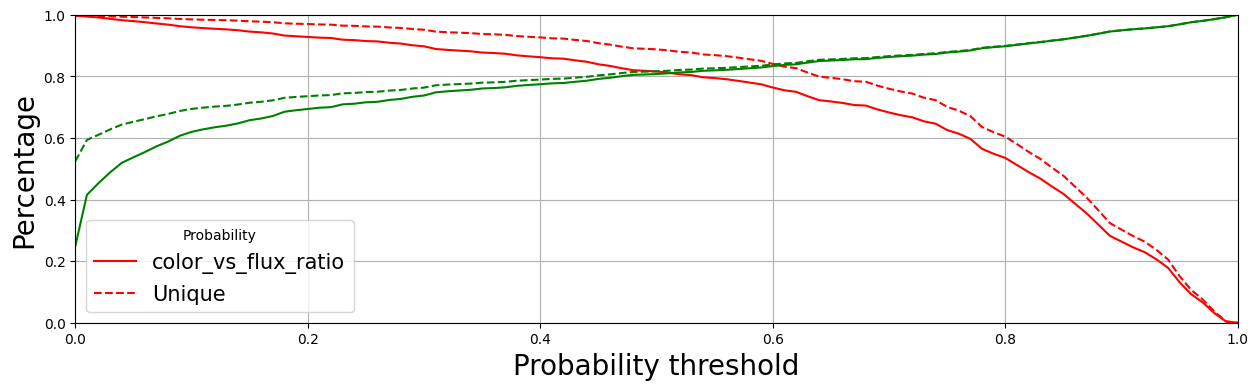

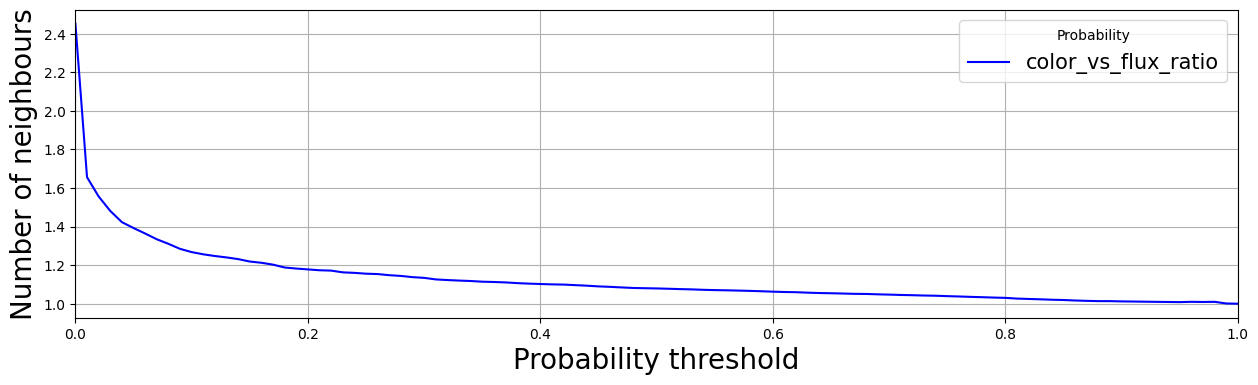

In [27]:
Choice = 2 ; mask = np.ones(len(table) , dtype = bool)   #1 = angDist, 2 = color_vs_flux_ratio, 3 = total

Proba = P[Choice -1]
C , R , C2 , R2 , N  = CR_computation(table[mask] ,Proba,liste_threshold )
colors = ["blue" , "orange" , "green"]

plt.figure(figsize=(15,4))
plt.plot(liste_threshold,C  , label = Proba[12:] , color = "red"   )
plt.plot(liste_threshold,C2 , label = "Unique"  , color = "red"   , linestyle = "dashed")
plt.plot(liste_threshold,R                      , color = "green"  )
plt.plot(liste_threshold,R2                     , color = "green" , linestyle = "dashed")

# plt.scatter(liste_threshold,reliability , marker = "x" , color = "black")
plt.xlim(0,1)
plt.ylim(0,1)
# plt.title("C&R Freund. no p_coronal < 0.5 !!!!")
_ = plt.legend(fontsize = 15 , title = "Probability")
plt.xlabel("Probability threshold" , fontsize = 20)
plt.ylabel("Percentage" , fontsize = 20)

plt.grid(True)

plt.figure(figsize=(15,4))
plt.plot(liste_threshold,N  , label = Proba[12:] , color = "blue" )
plt.xlim(0,1)
plt.xlabel("Probability threshold" , fontsize = 20)
plt.ylabel("Number of neighbours" , fontsize = 20)
_ = plt.legend(fontsize = 15 , title = "Probability")
plt.grid(True)




In [29]:
# Choice = 2 ; mask = np.ones(len(table) , dtype = bool)   #1 = angDist, 2 = color_vs_flux_ratio, 3 = total

# Proba = P[Choice -1]
# C , R , C2 , R2 , N , N_unique  = CR_computation_2(table[mask] ,Proba,liste_threshold )
# colors = ["blue" , "orange" , "green"]

# plt.figure(figsize=(15,4))
# plt.plot(liste_threshold,C  , label = Proba[12:] , color = "red"   )
# plt.plot(liste_threshold,C2 , label = "Unique"  , color = "red"   , linestyle = "dashed")
# plt.plot(liste_threshold,R                      , color = "green"  )
# plt.plot(liste_threshold,R2                     , color = "green" , linestyle = "dashed")

# # plt.scatter(liste_threshold,reliability , marker = "x" , color = "black")
# plt.xlim(0,1)
# plt.ylim(0,1)
# # plt.title("C&R Freund. no p_coronal < 0.5 !!!!")
# _ = plt.legend(fontsize = 15 , title = "Probability")
# plt.xlabel("Probability threshold" , fontsize = 20)
# plt.ylabel("Percentage" , fontsize = 20)

# plt.grid(True)

# plt.figure(figsize=(15,4))
# plt.plot(liste_threshold,N  , label = Proba[12:] , color = "blue" )
# plt.xlim(0,1)
# plt.xlabel("Probability threshold" , fontsize = 20)
# plt.ylabel("Number of neighbours" , fontsize = 20)
# _ = plt.legend(fontsize = 15 , title = "Probability")
# plt.grid(True)


# plt.figure(figsize=(15,4))
# plt.plot(liste_threshold,N_unique  , label = Proba[12:] , color = "blue" )
# plt.xlim(0,1)
# plt.xlabel("Probability threshold" , fontsize = 20)
# plt.ylabel("Number of sources with at least 2 neighbourg" , fontsize = 20)
# _ = plt.legend(fontsize = 15 , title = "Probability")
# plt.grid(True)